# Sieci rekurencyjne (RNN) i LSTM w przetwarzaniu języka naturalnego

![RNN and LSTM for NLP](https://miro.medium.com/v2/resize:fit:1400/1*laH0_xXEkFE0lKJu54gkFQ.png)

## Cele edukacyjne

* **Zrozumienie sieci rekurencyjnych (RNN)** – poznasz budowę i zasadę działania sieci neuronowych przetwarzających sekwencje danych.
* **Problemy tradycyjnych RNN** – dowiesz się o problemach znikającego i eksplodującego gradientu w sieciach rekurencyjnych.
* **Wprowadzenie do LSTM** – poznasz architekturę Long Short-Term Memory i sposób rozwiązania problemów RNN.
* **Zastosowania w NLP** – nauczysz się implementować sieci rekurencyjne do zadań przetwarzania języka naturalnego.
* **Praktyczne implementacje** – zbudujesz modele do klasyfikacji tekstu, generowania tekstu i analizy sentymentu.

## Wprowadzenie do sieci rekurencyjnych (RNN)

![RNN Architecture](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1200px-Recurrent_neural_network_unfold.svg.png)

**Sieci rekurencyjne (Recurrent Neural Networks - RNN)** to typ sieci neuronowych zaprojektowanych do przetwarzania sekwencji danych. W przeciwieństwie do tradycyjnych sieci neuronowych, RNN mają "pamięć" - mogą wykorzystywać informacje z poprzednich kroków czasowych do przetwarzania bieżących danych.

### Kluczowe cechy RNN:

* **Przetwarzanie sekwencyjne** – dane są przetwarzane krok po kroku w określonej kolejności
* **Pamięć** – sieć "pamięta" poprzednie stany dzięki połączeniom rekurencyjnym
* **Dzielenie parametrów** – te same wagi są używane dla każdego kroku czasowego
* **Zmienna długość sekwencji** – mogą przetwarzać sekwencje o różnej długości

### Zastosowania RNN:

* **Analiza tekstu** – klasyfikacja sentymentu, rozpoznawanie encji
* **Generowanie tekstu** – tworzenie poezji, artykułów, kodu
* **Tłumaczenie maszynowe** – przekład z jednego języka na inny
* **Rozpoznawanie mowy** – konwersja mowy na tekst
* **Analiza szeregów czasowych** – prognozowanie giełdowe, pogoda


### Równania RNN

**Stan ukryty w czasie \(t\):**

$$
h_t = \tanh\bigl(W_{hh}\,h_{t-1} + W_{xh}\,x_t + b_h\bigr)
$$

**Wyjście w czasie \(t\):**

$$
y_t = W_{hy}\,h_t + b_y
$$

Gdzie:
- \(h_t\) — stan ukryty w czasie \(t\)  
- \(x_t\) — wejście w czasie \(t\)  
- \(y_t\) — wyjście w czasie \(t\)  
- \(W_{hh}\) — wagi dla połączeń rekurencyjnych  
- \(W_{xh}\) — wagi dla wejść  
- \(W_{hy}\) — wagi dla wyjść  
- \(b_h, b_y\) — biasy  


## Problemy tradycyjnych RNN

![Vanishing Gradient](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/31_blog_image_2.png)

### 1. Problem znikającego gradientu

**Przyczyna:** Podczas wstecznej propagacji przez wiele kroków czasowych, gradienty mogą stać się bardzo małe, co sprawia, że sieć nie może nauczyć się długoterminowych zależności.

**Skutek:** Sieć "zapomina" informacje z odległych kroków czasowych.

### 2. Problem eksplodującego gradientu

**Przyczyna:** Gradienty mogą stać się bardzo duże, powodując niestabilność treningu.

**Skutek:** Wagi sieci zmieniają się drastycznie, co prowadzi do niestabilności.

### 3. Ograniczona pamięć

**Problem:** Tradycyjne RNN mają trudności z zapamiętywaniem informacji z długich sekwencji.

## Long Short-Term Memory (LSTM)

![LSTM Architecture](https://miro.medium.com/v2/resize:fit:984/1*Mb_L_slY9rjMr8-IADHvwg.png)

**LSTM (Long Short-Term Memory)** to specjalny typ sieci rekurencyjnej zaprojektowany do rozwiązania problemów tradycyjnych RNN. LSTM może uczyć się długoterminowych zależności dzięki swojej unikalnej architekturze.

### Kluczowe komponenty LSTM:

#### 1. Stan komórki (Cell State)
- Główna "pamięć" sieci
- Przepływa przez całą sieć z minimalnymi zmianami
- Pozwala na zachowanie informacji przez długi czas

#### 2. Bramka zapomnienia (Forget Gate)
- Decyduje, które informacje z poprzedniego stanu komórki należy "zapomnieć"
- Używa funkcji sigmoid (wartości 0-1)

#### 3. Bramka wejściowa (Input Gate)
- Decyduje, które nowe informacje będą przechowywane w stanie komórki
- Składa się z dwóch części: sigmoid i tanh

#### 4. Bramka wyjściowa (Output Gate)
- Decyduje, które części stanu komórki będą użyte do wygenerowania wyjścia
- Kontroluje stan ukryty h_t

## Implementacja praktyczna

Teraz przejdźmy do praktycznej implementacji sieci rekurencyjnych w TensorFlow/Keras.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Ustawienia dla powtarzalności
np.random.seed(42)
tf.random.set_seed(42)

# Konfiguracja wyświetlania
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

print("Biblioteki załadowane pomyślnie!")
print(f"TensorFlow version: {tf.__version__}")

Biblioteki załadowane pomyślnie!
TensorFlow version: 2.19.0


## Przykład 1: Prosta klasyfikacja sentymentu z RNN

Zacznijmy od prostego przykładu klasyfikacji sentymentu używając danych IMDB.

In [ ]:
# Ładowanie danych IMDB
from tensorflow.keras.datasets import imdb

# Parametry
vocab_size = 100
max_length = 10

# Ładowanie danych
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f"Liczba próbek treningowych: {len(X_train)}")
print(f"Liczba próbek testowych: {len(X_test)}")
print(f"Przykładowa długość recenzji: {len(X_train[0])}")
print(f"Pierwsza recenzja (pierwsze 10 słów): {X_train[0][:10]}")

Liczba próbek treningowych: 25000
Liczba próbek testowych: 25000
Przykładowa długość recenzji: 218
Pierwsza recenzja (pierwsze 10 słów): [1, 14, 22, 16, 43, 2, 2, 2, 2, 65]


In [16]:
len(X_train[0])

218

In [17]:
# Preprocessing danych
X_train = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

print(f"Kształt danych treningowych: {X_train.shape}")
print(f"Kształt danych testowych: {X_test.shape}")
print(f"Rozkład klas treningowych: {np.bincount(y_train)}")

Kształt danych treningowych: (25000, 10)
Kształt danych testowych: (25000, 10)
Rozkład klas treningowych: [12500 12500]


In [18]:
len(X_train[0])

10

### Budowanie prostego modelu RNN

In [19]:
def build_simple_rnn_model(vocab_size, max_length, embedding_dim=128, rnn_units=64):
    """
    Buduje prosty model RNN do klasyfikacji sentymentu.
    
    Args:
        vocab_size: Rozmiar słownika
        max_length: Maksymalna długość sekwencji
        embedding_dim: Wymiar warstwy embedding
        rnn_units: Liczba jednostek w warstwie RNN
    
    Returns:
        Skompilowany model Keras
    """
    model = keras.Sequential([
        layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        layers.SimpleRNN(rnn_units, dropout=0.2, recurrent_dropout=0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Budowanie modelu
rnn_model = build_simple_rnn_model(vocab_size, max_length)
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Trenowanie modelu RNN
history_rnn = rnn_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    verbose=1
)

# Ewaluacja
test_loss, test_accuracy = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"\nWyniki testowe RNN:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Loss: {test_loss:.4f}")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5147 - loss: 0.6971 - val_accuracy: 0.5606 - val_loss: 0.6819
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5611 - loss: 0.6802 - val_accuracy: 0.5566 - val_loss: 0.6816
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5762 - loss: 0.6746 - val_accuracy: 0.5670 - val_loss: 0.6788
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5782 - loss: 0.6712 - val_accuracy: 0.5552 - val_loss: 0.6846
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5837 - loss: 0.6706 - val_accuracy: 0.5630 - val_loss: 0.6829

Wyniki testowe RNN:
Accuracy: 0.5622
Loss: 0.6804


### Budowanie modelu LSTM

In [21]:
def build_lstm_model(vocab_size, max_length, embedding_dim=128, lstm_units=64):
    """
    Buduje model LSTM do klasyfikacji sentymentu.
    
    Args:
        vocab_size: Rozmiar słownika
        max_length: Maksymalna długość sekwencji
        embedding_dim: Wymiar warstwy embedding
        lstm_units: Liczba jednostek w warstwie LSTM
    
    Returns:
        Skompilowany model Keras
    """
    model = keras.Sequential([
        layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        layers.LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Budowanie modelu LSTM
lstm_model = build_lstm_model(vocab_size, max_length)
lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Trenowanie modelu LSTM
history_lstm = lstm_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    verbose=1
)

# Ewaluacja
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"\nWyniki testowe LSTM:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Loss: {test_loss:.4f}")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5406 - loss: 0.6867 - val_accuracy: 0.5666 - val_loss: 0.6764
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5686 - loss: 0.6739 - val_accuracy: 0.5644 - val_loss: 0.6762
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5746 - loss: 0.6706 - val_accuracy: 0.5654 - val_loss: 0.6752
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5741 - loss: 0.6682 - val_accuracy: 0.5704 - val_loss: 0.6746
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5769 - loss: 0.6658 - val_accuracy: 0.5718 - val_loss: 0.6734

Wyniki testowe LSTM:
Accuracy: 0.5691
Loss: 0.6725


### Porównanie wyników RNN vs LSTM

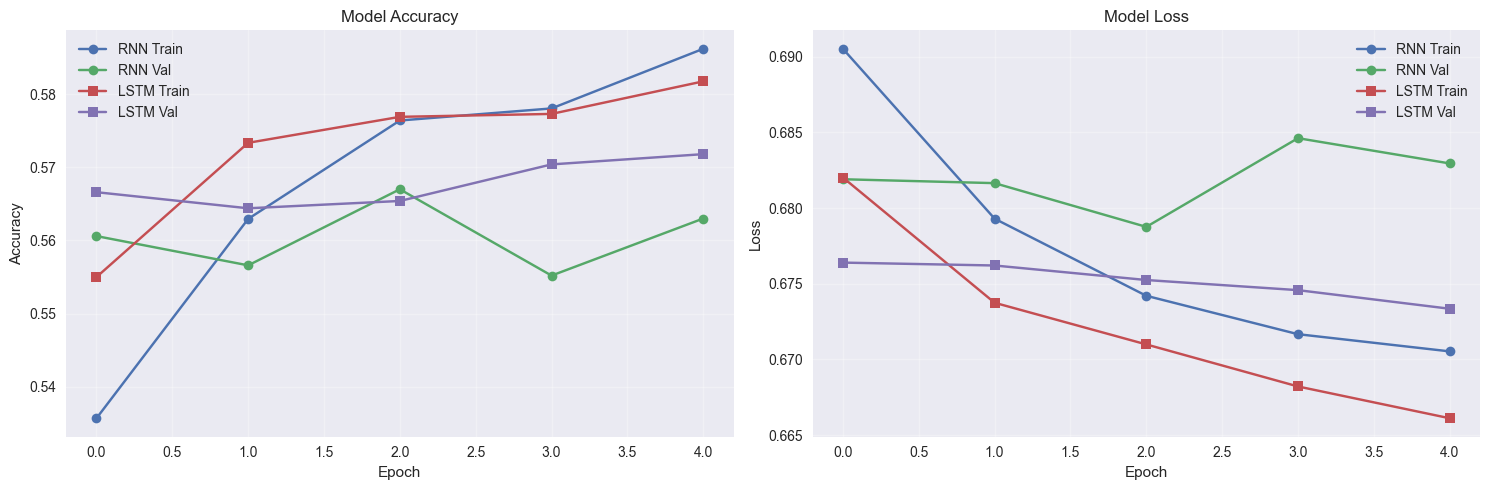

In [23]:
def plot_training_history(history_rnn, history_lstm):
    """
    Porównuje historię treningu RNN i LSTM.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Accuracy
    ax1.plot(history_rnn.history['accuracy'], label='RNN Train', marker='o')
    ax1.plot(history_rnn.history['val_accuracy'], label='RNN Val', marker='o')
    ax1.plot(history_lstm.history['accuracy'], label='LSTM Train', marker='s')
    ax1.plot(history_lstm.history['val_accuracy'], label='LSTM Val', marker='s')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Loss
    ax2.plot(history_rnn.history['loss'], label='RNN Train', marker='o')
    ax2.plot(history_rnn.history['val_loss'], label='RNN Val', marker='o')
    ax2.plot(history_lstm.history['loss'], label='LSTM Train', marker='s')
    ax2.plot(history_lstm.history['val_loss'], label='LSTM Val', marker='s')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history_rnn, history_lstm)

## Przykład 2: Głębszy model LSTM z wieloma warstwami

Teraz zbudujemy bardziej zaawansowany model z wieloma warstwami LSTM.

In [24]:
def build_deep_lstm_model(vocab_size, max_length, embedding_dim=128, lstm_units=64):
    """
    Buduje głęboki model LSTM z wieloma warstwami.
    
    Args:
        vocab_size: Rozmiar słownika
        max_length: Maksymalna długość sekwencji
        embedding_dim: Wymiar warstwy embedding
        lstm_units: Liczba jednostek w warstwach LSTM
    
    Returns:
        Skompilowany model Keras
    """
    model = keras.Sequential([
        layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        
        # Pierwsza warstwa LSTM - zwraca sekwencje
        layers.LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
        
        # Druga warstwa LSTM - zwraca sekwencje
        layers.LSTM(lstm_units//2, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
        
        # Trzecia warstwa LSTM - zwraca tylko ostatnie wyjście
        layers.LSTM(lstm_units//4, dropout=0.2, recurrent_dropout=0.2),
        
        # Warstwa Dense z regularyzacją
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        
        # Warstwa wyjściowa
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Budowanie głębokiego modelu LSTM
deep_lstm_model = build_deep_lstm_model(vocab_size, max_length)
deep_lstm_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Trenowanie głębokiego modelu LSTM
history_deep_lstm = deep_lstm_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    verbose=1
)

# Ewaluacja
test_loss, test_accuracy = deep_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"\nWyniki testowe głębokiego LSTM:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Loss: {test_loss:.4f}")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.5319 - loss: 0.6890 - val_accuracy: 0.5568 - val_loss: 0.6780
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.5658 - loss: 0.6771 - val_accuracy: 0.5620 - val_loss: 0.6769
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5730 - loss: 0.6725 - val_accuracy: 0.5670 - val_loss: 0.6737
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.5772 - loss: 0.6698 - val_accuracy: 0.5738 - val_loss: 0.6717
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.5799 - loss: 0.6668 - val_accuracy: 0.5760 - val_loss: 0.6723

Wyniki testowe głębokiego LSTM:
Accuracy: 0.5686
Loss: 0.6728


## Przykład 3: Dwukierunkowy LSTM (Bidirectional LSTM)

Bidirectional LSTM przetwarza sekwencję w obu kierunkach (do przodu i do tyłu), co może poprawić rozumienie kontekstu.

In [26]:
def build_bidirectional_lstm_model(vocab_size, max_length, embedding_dim=128, lstm_units=64):
    """
    Buduje dwukierunkowy model LSTM.
    
    Args:
        vocab_size: Rozmiar słownika
        max_length: Maksymalna długość sekwencji
        embedding_dim: Wymiar warstwy embedding
        lstm_units: Liczba jednostek w warstwie LSTM
    
    Returns:
        Skompilowany model Keras
    """
    model = keras.Sequential([
        layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        
        # Dwukierunkowa warstwa LSTM
        layers.Bidirectional(layers.LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2)),
        
        # Warstwa Dense z regularyzacją
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        
        # Warstwa wyjściowa
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Budowanie dwukierunkowego modelu LSTM
bidirectional_lstm_model = build_bidirectional_lstm_model(vocab_size, max_length)
bidirectional_lstm_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Trenowanie dwukierunkowego modelu LSTM
history_bidirectional_lstm = bidirectional_lstm_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    verbose=1
)

# Ewaluacja
test_loss, test_accuracy = bidirectional_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"\nWyniki testowe dwukierunkowego LSTM:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Loss: {test_loss:.4f}")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.5338 - loss: 0.6873 - val_accuracy: 0.5692 - val_loss: 0.6763
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5716 - loss: 0.6741 - val_accuracy: 0.5662 - val_loss: 0.6751
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5785 - loss: 0.6694 - val_accuracy: 0.5684 - val_loss: 0.6733
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5794 - loss: 0.6658 - val_accuracy: 0.5684 - val_loss: 0.6722
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5844 - loss: 0.6637 - val_accuracy: 0.5724 - val_loss: 0.6729

Wyniki testowe dwukierunkowego LSTM:
Accuracy: 0.5733
Loss: 0.6711


## Przykład 4: Generowanie tekstu z LSTM

Teraz zbudujemy model do generowania tekstu na podstawie nauczonych wzorców.

In [ ]:
# Przykładowy tekst do nauki
sample_text = """
Sztuczna inteligencja to dziedzina informatyki zajmująca się tworzeniem systemów komputerowych 
zdolnych do wykonywania zadań wymagających inteligencji. Uczenie maszynowe jest poddziedziną 
sztucznej inteligencji, która koncentruje się na algorytmach uczących się z danych. 
Sieci neuronowe to modele inspirowane działaniem ludzkiego mózgu. Głębokie uczenie wykorzystuje 
sieci neuronowe z wieloma warstwami do rozwiązywania złożonych problemów. Przetwarzanie języka 
naturalnego pozwala komputerom rozumieć i generować tekst w językach naturalnych. 
Wizja komputerowa umożliwia maszynom interpretację i analizę obrazów. Robotyka łączy sztuczną 
inteligencję z systemami fizycznymi. Przyszłość sztucznej inteligencji obejmuje rozwój 
bardziej zaawansowanych i wszechstronnych systemów.
"""

# Preprocessing tekstu
text = sample_text.lower().replace('\n', ' ')
chars = sorted(list(set(text)))
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for idx, char in enumerate(chars)}

print(f"Długość tekstu: {len(text)}")
print(f"Liczba unikalnych znaków: {len(chars)}")
print(f"Pierwsze 100 znaków: {text[:100]}")

In [ ]:
def prepare_text_data(text, char_to_idx, sequence_length=40):
    """
    Przygotowuje dane do treningu modelu generującego tekst.
    
    Args:
        text: Tekst wejściowy
        char_to_idx: Słownik mapujący znaki na indeksy
        sequence_length: Długość sekwencji wejściowej
    
    Returns:
        X, y: Dane wejściowe i wyjściowe
    """
    X = []
    y = []
    
    for i in range(0, len(text) - sequence_length):
        sequence = text[i:i + sequence_length]
        target = text[i + sequence_length]
        
        X.append([char_to_idx[char] for char in sequence])
        y.append(char_to_idx[target])
    
    return np.array(X), np.array(y)

# Przygotowanie danych
sequence_length = 40
X_text, y_text = prepare_text_data(text, char_to_idx, sequence_length)

print(f"Kształt X: {X_text.shape}")
print(f"Kształt y: {y_text.shape}")

# Normalizacja danych
X_text = X_text / float(len(chars))
y_text = to_categorical(y_text, num_classes=len(chars))

print(f"Kształt y po kategoryzacji: {y_text.shape}")

In [ ]:
def build_text_generation_model(sequence_length, vocab_size, lstm_units=128):
    """
    Buduje model LSTM do generowania tekstu.
    
    Args:
        sequence_length: Długość sekwencji wejściowej
        vocab_size: Rozmiar słownika
        lstm_units: Liczba jednostek w warstwie LSTM
    
    Returns:
        Skompilowany model Keras
    """
    model = keras.Sequential([
        layers.LSTM(lstm_units, input_shape=(sequence_length, 1), return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(lstm_units),
        layers.Dropout(0.2),
        layers.Dense(vocab_size, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Budowanie modelu
text_model = build_text_generation_model(sequence_length, len(chars))
text_model.summary()

In [ ]:
# Przygotowanie danych do treningu
X_text_reshaped = X_text.reshape((X_text.shape[0], X_text.shape[1], 1))

# Trenowanie modelu (krótkie trenowanie dla demonstracji)
history_text = text_model.fit(
    X_text_reshaped, y_text,
    batch_size=32,
    epochs=20,
    verbose=1
)

print("\nModel wytrenowany!")

In [ ]:
import numpy as np

def generate_text(model, start_string, char_to_idx, idx_to_char,
                  sequence_length, chars, length=200, temperature=1.0):
    """
    Generuje tekst używając wytrenowanego modelu.

    Args:
        model: Wytrenowany model (np. Keras Sequential)
        start_string: Tekst startowy
        char_to_idx: Słownik mapujący znaki na indeksy
        idx_to_char: Słownik mapujący indeksy na znaki
        sequence_length: Długość sekwencji wejściowej oczekiwana przez model
        chars: Lista wszystkich znaków w słowniku
        length: Długość generowanego tekstu (liczba znaków)
        temperature: Parametr kontrolujący losowość

    Returns:
        Wygenerowany tekst (string)
    """
    # Przygotuj początkowy ciąg o dokładnej długości sequence_length
    generated = start_string
    if len(generated) < sequence_length:
        generated = ' ' * (sequence_length - len(generated)) + generated
    else:
        generated = generated[-sequence_length:]

    for _ in range(length):
        # One-hot encoding
        x = np.zeros((1, sequence_length, len(chars)))
        for t, ch in enumerate(generated[-sequence_length:]):
            idx = char_to_idx.get(ch, 0)
            x[0, t, idx] = 1.0

        # Predykcja
        preds = model.predict(x, verbose=0)[0]
        preds = np.maximum(preds, 1e-12)       # zabezpieczenie przed log(0)
        preds = np.log(preds) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)

        # Losowy wybór znaku wg rozkładu
        next_idx = np.random.choice(len(chars), p=preds)
        next_char = idx_to_char[next_idx]

        generated += next_char

    return generated


sequence_length = text_model.input_shape[1]
chars = list(char_to_idx.keys())

start_text = "sztuczna inteligencja to "
generated = generate_text(
    text_model, start_text,
    char_to_idx, idx_to_char,
    sequence_length, chars,
    length=200, temperature=0.8
)

print("Wygenerowany tekst:")
print(generated)


## Przykład 5: Analiza sekwencji czasowych z LSTM

Sprawdźmy, jak LSTM radzi sobie z danymi sekwencyjnymi na przykładzie syntetycznych danych czasowych.

In [ ]:
def create_time_series_data(n_samples=1000, sequence_length=50):
    """
    Tworzy syntetyczne dane szeregów czasowych.
    
    Args:
        n_samples: Liczba próbek
        sequence_length: Długość sekwencji
    
    Returns:
        X, y: Dane wejściowe i wyjściowe
    """
    X = []
    y = []
    
    for i in range(n_samples):
        # Generowanie sekwencji sinusoidalnej z szumem
        t = np.linspace(0, 4*np.pi, sequence_length + 1)
        frequency = np.random.uniform(0.5, 2.0)
        amplitude = np.random.uniform(0.5, 1.5)
        phase = np.random.uniform(0, 2*np.pi)
        
        series = amplitude * np.sin(frequency * t + phase) + np.random.normal(0, 0.1, sequence_length + 1)
        
        X.append(series[:-1])
        y.append(series[-1])
    
    return np.array(X), np.array(y)

# Tworzenie danych
X_ts, y_ts = create_time_series_data(n_samples=1000, sequence_length=50)

print(f"Kształt X: {X_ts.shape}")
print(f"Kształt y: {y_ts.shape}")

# Podział na zbiory treningowe i testowe
X_train_ts, X_test_ts, y_train_ts, y_test_ts = train_test_split(
    X_ts, y_ts, test_size=0.2, random_state=42
)

# Wizualizacja przykładowych szeregów
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
    axes[i].plot(X_train_ts[i], label='Sekwencja wejściowa')
    axes[i].axhline(y=y_train_ts[i], color='red', linestyle='--', label=f'Cel: {y_train_ts[i]:.2f}')
    axes[i].set_title(f'Przykład {i+1}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
def build_time_series_lstm(sequence_length, lstm_units=64):
    """
    Buduje model LSTM do predykcji szeregów czasowych.
    
    Args:
        sequence_length: Długość sekwencji wejściowej
        lstm_units: Liczba jednostek w warstwie LSTM
    
    Returns:
        Skompilowany model Keras
    """
    model = keras.Sequential([
        layers.LSTM(lstm_units, input_shape=(sequence_length, 1), return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(lstm_units//2),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    
    return model

# Przygotowanie danych
X_train_ts_reshaped = X_train_ts.reshape((X_train_ts.shape[0], X_train_ts.shape[1], 1))
X_test_ts_reshaped = X_test_ts.reshape((X_test_ts.shape[0], X_test_ts.shape[1], 1))

# Budowanie modelu
ts_model = build_time_series_lstm(sequence_length=50)
ts_model.summary()

In [ ]:
# Trenowanie modelu
history_ts = ts_model.fit(
    X_train_ts_reshaped, y_train_ts,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

# Ewaluacja
test_loss, test_mae = ts_model.evaluate(X_test_ts_reshaped, y_test_ts, verbose=0)
print(f"\nWyniki testowe szeregów czasowych:")
print(f"MSE: {test_loss:.4f}")
print(f"MAE: {test_mae:.4f}")

In [ ]:
# Predykcje i wizualizacja
predictions_ts = ts_model.predict(X_test_ts_reshaped)

# Wizualizacja wyników
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
    axes[i].plot(X_test_ts[i], label='Sekwencja wejściowa', alpha=0.7)
    axes[i].axhline(y=y_test_ts[i], color='red', linestyle='--', label=f'Prawdziwa wartość: {y_test_ts[i]:.2f}')
    axes[i].axhline(y=predictions_ts[i][0], color='green', linestyle=':', label=f'Predykcja: {predictions_ts[i][0]:.2f}')
    axes[i].set_title(f'Przykład {i+1}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Korelacja między predykcjami a prawdziwymi wartościami
correlation = np.corrcoef(y_test_ts, predictions_ts.flatten())[0, 1]
print(f"\nKorelacja między predykcjami a prawdziwymi wartościami: {correlation:.4f}")

## Podsumowanie i wnioski

### Główne różnice między RNN a LSTM:

| Aspekt | RNN | LSTM |
|--------|-----|------|
| **Pamięć** | Krótkoterminowa | Długoterminowa |
| **Problem gradientu** | Znikający gradient | Rozwiązany przez bramki |
| **Złożoność** | Prosta | Bardziej złożona |
| **Wydajność** | Szybsza | Wolniejsza |
| **Zastosowania** | Krótkie sekwencje | Długie sekwencje |

### Kluczowe zalety LSTM:

1. **Kontrola przepływu informacji** - bramki pozwalają na selektywne zachowywanie i usuwanie informacji
2. **Rozwiązanie problemu znikającego gradientu** - dzięki architekturze z bramkami
3. **Elastyczność** - możliwość pracy z sekwencjami o różnej długości
4. **Wszechstronność** - zastosowanie w wielu zadaniach NLP

### Praktyczne wskazówki:

1. **Wybór architektury:**
   - RNN: dla prostych zadań z krótkimi sekwencjami
   - LSTM: dla zadań wymagających długoterminowej pamięci
   - Bidirectional LSTM: gdy kontekst z obu stron jest ważny

2. **Hiperparametry:**
   - Liczba jednostek: 64-256 dla większości zadań
   - Dropout: 0.2-0.5 dla regularyzacji
   - Liczba warstw: 1-3 dla większości zastosowań

3. **Preprocessing:**
   - Padding sekwencji do jednakowej długości
   - Normalizacja danych wejściowych
   - Tokenizacja tekstu

### Przyszłość sieci rekurencyjnych:

Chociaż modele Transformer (jak BERT, GPT) stały się popularne w NLP, sieci rekurencyjne nadal mają swoje zastosowania:
- Przetwarzanie w czasie rzeczywistym
- Zadania z ograniczoną pamięcią
- Szeregi czasowe
- Małe zbiory danych

Sieci rekurencyjne, szczególnie LSTM, pozostają ważnym narzędziem w arsenale specjalistów od uczenia maszynowego i przetwarzania języka naturalnego.